In [ ]:
%pip install numpy pandas river

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 116.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import time

In [ ]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
df = pd.read_csv(path+'/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


This notebook evaluates various online machine learning models from the `River` library for credit card fraud detection. We'll compare their performance using F1 score and MCC, considering different scaling and sampling techniques, and visualize their historical performance over time.

In [ ]:
import river
from river.linear_model import LogisticRegression
from river.forest import ARFClassifier
from river.linear_model import PAClassifier
from river.ensemble import AdaBoostClassifier, ADWINBoostingClassifier
from river.tree import HoeffdingTreeClassifier
from river.imblearn import HardSamplingClassifier, RandomSampler
from river.metrics import F1, MCC
from river.preprocessing import StandardScaler
from river.stream import iter_pandas

# Modulation
Creating a Python function `evaluate_model_pipeline` that takes a River model, its name, and the feature/target data (`X`, `y`) as input. This function will encapsulate the online learning loop, calculate F1 and MCC scores, print progress, and return the final F1 and MCC scores along with runtime.

Then, preparing a list of the following River models (including their corresponding scalers and sampling techniques, if applicable) that have been used previously in the notebook:
1.  Logistic Regression (No Scaling)
2.  Scaled Logistic Regression
3.  Scaled Adaptive Random Forest (`ARFClassifier`)
4.  Scaled Passive Aggressive Classifier (`PAClassifier`)
5.  Scaled AdaBoost (with `HoeffdingTreeClassifier`)
6.  `ARFClassifier` with HardSampling
7.  AdaBoost with HardSampling (with Scaled `HoeffdingTreeClassifier`)
8.  `ADWINBoostingClassifier` (with Scaled `LogisticRegression`)

Iterating through this list, call the `evaluate_model_pipeline` function for each model, and store the returned F1, MCC, and ROC AUC scores along with the model name. Finally, display all the collected results in a Pandas DataFrame and generate bar plots for F1 Score and MCC Score to visually compare the models.

In [ ]:
# @title Evaluate Model Function

X_data = df.drop('Class', axis=1)
y_data = df['Class']

def evaluate_model_pipeline(model, model_name, X, y):
    """
    Evaluates a River model pipeline using online learning, calculating F1 and MCC scores.
    Stores historical scores at 10,000-row intervals.

    Args:
        model: The River model pipeline (e.g., StandardScaler() | LogisticRegression()).
        model_name (str): The name of the model for printing progress.
        X (pd.DataFrame): The feature DataFrame.
        y (pd.Series): The target Series.

    Returns:
        tuple: A tuple containing the final F1 score, final MCC score, lists of historical F1 scores, historical MCC scores, corresponding row numbers and total runtime.
    """

    # Instantiate the metrics
    f1_metric = F1()
    mcc_metric = MCC()

    # Initialize empty lists to store historical scores and row numbers
    history_f1 = []
    history_mcc = []
    row_numbers = []


    # Start timing
    start_time = time.time()

    # Iterate through the DataFrame instance by instance
    for i, (x, y_true) in enumerate(iter_pandas(X, y)):

        # Predict and update metrics
        y_pred = model.predict_one(x)

        f1_metric.update(y_true, y_pred)
        mcc_metric.update(y_true, y_pred)

        # Learn from the true label
        model.learn_one(x, y_true)

        # Store scores every 10000 rows
        if (i + 1) % 10000 == 0:
            history_f1.append(f1_metric.get())
            history_mcc.append(mcc_metric.get())
            row_numbers.append(i + 1)


    # End timing
    end_time = time.time()
    total_time = end_time - start_time

    # Print final scores
    final_f1 = f1_metric.get()
    final_mcc = mcc_metric.get()
    print(f"\nFinal Scores with {model_name}:")
    print(f"Final F1 Score = {final_f1:.4f}")
    print(f"Final MCC Score = {final_mcc:.4f}")
    print(f"Total time taken: {total_time:.2f} seconds")

    return final_f1, final_mcc, history_f1, history_mcc, row_numbers, total_time

## Logistic Regression Models
Logistic Regression is a linear model for binary classification. We evaluate it with and without feature scaling, and also with HardSampling to address class imbalance.

In [ ]:
# @title Logistic Regression Models

# Evaluate Logistic Regression (No Scaling)
model_ns_logreg = LogisticRegression()
final_f1_ns, final_mcc_ns, hist_f1_ns, hist_mcc_ns, rows_ns, time_ns = evaluate_model_pipeline(model_ns_logreg, 'Logistic Regression (No Scaling)', X_data, y_data)


# Evaluate Scaled Logistic Regression
model_sc_logreg = StandardScaler() | LogisticRegression()
final_f1_sc, final_mcc_sc, hist_f1_sc, hist_mcc_sc, rows_sc, time_sc = evaluate_model_pipeline(model_sc_logreg, 'Scaled Logistic Regression', X_data, y_data)



# Evaluate HardSampling Logistic Regression
model_hs_logreg = HardSamplingClassifier(classifier=model_sc_logreg, size=100, p=0.2, seed=42)
final_f1_hs_logreg, final_mcc_hs_logreg, hist_f1_hs_logreg, hist_mcc_hs_logreg, rows_hs_logreg, time_hs_logreg = evaluate_model_pipeline(model_hs_logreg, 'HardSampling Logistic Regression', X_data, y_data)



# Store results for final DataFrame
results_summary = [
    {'Model': 'Logistic Regression (No Scaling)', 'Final F1 Score': final_f1_ns, 'Final MCC Score': final_mcc_ns, 'Total Runtime': time_ns},
    {'Model': 'Scaled Logistic Regression', 'Final F1 Score': final_f1_sc, 'Final MCC Score': final_mcc_sc, 'Total Runtime': time_sc},
    {'Model': 'HardSampling Logistic Regression', 'Final F1 Score': final_f1_hs_logreg, 'Final MCC Score': final_mcc_hs_logreg, 'Total Runtime': time_hs_logreg}
]

df_summary = pd.DataFrame(results_summary)
print("\n--- Final Scores Summary ---")
print(df_summary.iloc[0:3])


Final Scores with Logistic Regression (No Scaling):
Final F1 Score = 0.0588
Final MCC Score = 0.0572
Total time taken: 14.95 seconds

Final Scores with Scaled Logistic Regression:
Final F1 Score = 0.7933
Final MCC Score = 0.7969
Total time taken: 34.13 seconds

Final Scores with HardSampling Logistic Regression:
Final F1 Score = 0.4414
Final MCC Score = 0.4525
Total time taken: 40.93 seconds

--- Final Scores Summary ---
                              Model  Final F1 Score  Final MCC Score  \
0  Logistic Regression (No Scaling)        0.058824         0.057192   
1        Scaled Logistic Regression        0.793296         0.796936   
2  HardSampling Logistic Regression        0.441397         0.452487   

   Total Runtime  
0      14.948919  
1      34.126688  
2      40.930604  


## Adaptive Random Forest Models
Adaptive Random Forest (ARF) is an ensemble method for online learning. It handles concept drift and works well with data streams. We evaluate it with and without scaling, and with HardSampling.

In [ ]:
# @title Adaptive Random Forest Models

# Evaluate Adaptive Random Forest (ARF) (no Scaling)
model_ARF = ARFClassifier(n_models=10, seed=42)
final_f1_ARF, final_mcc_ARF, hist_f1_ARF, hist_mcc_ARF, rows_ARF, time_ARF = evaluate_model_pipeline(model_ARF, 'Adaptive Random Forest (no Scaling)', X_data, y_data)


# Evaluate Scaled Adaptive Random Forest (ARF)
model_sc_ARF = StandardScaler() | ARFClassifier(n_models=10, seed=42)
final_f1_sc_ARF, final_mcc_sc_ARF, hist_f1_sc_ARF, hist_mcc_sc_ARF, rows_sc_ARF, time_sc_ARF = evaluate_model_pipeline(model_sc_ARF, 'Scaled Adaptive Random Forest', X_data, y_data)


# Evaluate Hardsampling with Adaptive Randon Forest
base_arf = ARFClassifier(n_models=10, seed=42)
model_hs_arf = HardSamplingClassifier(classifier=base_arf, size=100, p=0.2, seed=42)

final_f1_hs_ARF, final_mcc_hs_ARF, hist_f1_hs_ARF, hist_mcc_hs_ARF, rows_hs_ARF, time_hs_ARF = evaluate_model_pipeline(model_hs_arf, 'HardSampling Adaptive Random Forest', X_data, y_data)



# Store results for the final dataframe
results_summary.extend([
    {'Model': 'Adaptive Random Forest (no Scaling)', 'Final F1 Score': final_f1_ARF, 'Final MCC Score': final_mcc_ARF, 'Total Runtime': time_ARF},
    {'Model': 'Scaled Adaptive Random Forest', 'Final F1 Score': final_f1_sc_ARF, 'Final MCC Score': final_mcc_sc_ARF, 'Total Runtime': time_sc_ARF},
    {'Model': 'HardSampling Adaptive Random Forest', 'Final F1 Score': final_f1_hs_ARF, 'Final MCC Score': final_mcc_hs_ARF, 'Total Runtime': time_hs_ARF}
])

df_summary = pd.DataFrame(results_summary)
print("\n--- Final Scores Summary ---")
print(df_summary.iloc[3:6])


Final Scores with Adaptive Random Forest (no Scaling):
Final F1 Score = 0.5008
Final MCC Score = 0.5720
Total time taken: 512.50 seconds

Final Scores with Scaled Adaptive Random Forest:
Final F1 Score = 0.4102
Final MCC Score = 0.4965
Total time taken: 460.02 seconds

Final Scores with HardSampling Adaptive Random Forest:
Final F1 Score = 0.7371
Final MCC Score = 0.7534
Total time taken: 565.80 seconds

--- Final Scores Summary ---
                                 Model  Final F1 Score  Final MCC Score  \
3  Adaptive Random Forest (no Scaling)        0.500754         0.571952   
4        Scaled Adaptive Random Forest        0.410175         0.496511   
5  HardSampling Adaptive Random Forest        0.737101         0.753400   

   Total Runtime  
3     512.502507  
4     460.019537  
5     565.795731  


## Passive Aggressive Classifier Models
Passive Aggressive Classifier (PAClassifier) is a simple yet effective online learning algorithm that updates the model only when a misclassification occurs. We evaluate it with and without scaling, and with HardSampling.

In [ ]:
# @title PassiveAgressive Classifier Models

#Evaluate PassiveAgressive Classifier (no Scaling)
model_pa = PAClassifier(C=0.01, mode=1)
final_f1_pa, final_mcc_pa, hist_f1_pa, hist_mcc_pa, rows_pa, time_pa = evaluate_model_pipeline(model_pa, 'Passive Agressive Classifier (no Scaling)', X_data, y_data)



# Evaluate Scaled PassiveAgressive Classifier
model_sc_pa = StandardScaler() | PAClassifier(C=0.01, mode=1)
final_f1_sc_pa, final_mcc_sc_pa, hist_f1_sc_pa, hist_mcc_sc_pa, rows_sc_pa, time_sc_pa = evaluate_model_pipeline(model_sc_pa, 'Scaled Passive Agressive Classifier', X_data, y_data)



# Evaluate HardSampling with PassiveAgressive Classifiers
base_pa = StandardScaler() | PAClassifier(C=0.01, mode=1)
model_hs_pa = HardSamplingClassifier(classifier=base_pa, size=100, p=0.2, seed=42)

final_f1_hs_pa, final_mcc_hs_pa, hist_f1_hs_pa, hist_mcc_hs_pa, rows_hs_pa, time_hs_pa = evaluate_model_pipeline(model_hs_pa, 'HardSampling Passive Agressive Classifier', X_data, y_data)



# Store results for the final dataframe
results_summary.extend([
    {'Model': 'Passive Agressive Classifier (no Scaling)', 'Final F1 Score': final_f1_pa, 'Final MCC Score': final_mcc_pa, 'Total Runtime': time_pa},
    {'Model': 'Scaled Passive Agressive Classifier', 'Final F1 Score': final_f1_sc_pa, 'Final MCC Score': final_mcc_sc_pa, 'Total Runtime': time_sc_pa},
    {'Model': 'HardSampling Passive Agressive Classifier', 'Final F1 Score': final_f1_hs_pa, 'Final MCC Score': final_mcc_hs_pa, 'Total Runtime': time_hs_pa}
])

df_summary = pd.DataFrame(results_summary)
print("\n--- Final Scores Summary ---")
print(df_summary.iloc[6:9])


Final Scores with Passive Agressive Classifier (no Scaling):
Final F1 Score = 0.0528
Final MCC Score = 0.0512
Total time taken: 11.48 seconds

Final Scores with Scaled Passive Agressive Classifier:
Final F1 Score = 0.8000
Final MCC Score = 0.8020
Total time taken: 28.52 seconds

Final Scores with HardSampling Passive Agressive Classifier:
Final F1 Score = 0.5483
Final MCC Score = 0.5972
Total time taken: 39.36 seconds

--- Final Scores Summary ---
                                       Model  Final F1 Score  Final MCC Score  \
6  Passive Agressive Classifier (no Scaling)        0.052830         0.051206   
7        Scaled Passive Agressive Classifier        0.800000         0.801971   
8  HardSampling Passive Agressive Classifier        0.548295         0.597199   

   Total Runtime  
6      11.480768  
7      28.523685  
8      39.362953  


## AdaBoost Classifier Models
AdaBoost (Adaptive Boosting) is an ensemble meta-algorithm that can be used with a variety of other learning algorithms to improve performance. We use it with Logistic Regression, Hoeffding Trees, and Passive Aggressive Classifiers as base estimators.

In [ ]:
# @title AdaBoost Classifier Models

# Evaluate AdaBoost Logistic Regression
model_ada = AdaBoostClassifier(model=StandardScaler() | LogisticRegression(), n_models = 10, seed=42)
final_f1_ada, final_mcc_ada, hist_f1_ada, hist_mcc_ada, rows_ada, time_ada = evaluate_model_pipeline(model_ada, 'AdaBoost Logistic Regression', X_data, y_data)


# Evaluate AdaBoost PassiveAgressive Classifier
model_ada_pa = AdaBoostClassifier(model=StandardScaler() | PAClassifier(C=0.1, mode=1), n_models = 10, seed=42)
final_f1_ada_pa, final_mcc_ada_pa, hist_f1_ada_pa, hist_mcc_ada_pa, rows_ada_pa, time_ada_pa = evaluate_model_pipeline(model_ada_pa, 'AdaBoost PassiveAgressive Classifier', X_data, y_data)


# Store scores in the result summary
results_summary.extend([
    {'Model': 'AdaBoost Logistic Regression', 'Final F1 Score': final_f1_ada, 'Final MCC Score': final_mcc_ada, 'Total Runtime': time_ada},
    {'Model': 'AdaBoost PassiveAgressive Classifier', 'Final F1 Score': final_f1_ada_pa, 'Final MCC Score': final_mcc_ada_pa, 'Total Runtime': time_ada_pa}
])

df_summary = pd.DataFrame(results_summary)
print("\n--- Final Scores Summary ---")
print(df_summary.iloc[9:11])


Final Scores with AdaBoost Logistic Regression:
Final F1 Score = 0.7404
Final MCC Score = 0.7400
Total time taken: 246.54 seconds

Final Scores with AdaBoost PassiveAgressive Classifier:
Final F1 Score = 0.7518
Final MCC Score = 0.7514
Total time taken: 216.25 seconds

--- Final Scores Summary ---
                                   Model  Final F1 Score  Final MCC Score  \
9           AdaBoost Logistic Regression        0.740443         0.740027   
10  AdaBoost PassiveAgressive Classifier        0.751788         0.751370   

    Total Runtime  
9      246.536836  
10     216.249747  


In [ ]:
# Evaluate AdaBoost Hoeffding Tree
model_ada_ht = AdaBoostClassifier(model=StandardScaler() | HoeffdingTreeClassifier(), n_models = 10, seed=42)
final_f1_ada_ht, final_mcc_ada_ht, hist_f1_ada_ht, hist_mcc_ada_ht, rows_ada_ht, time_ada_ht = evaluate_model_pipeline(model_ada_ht, 'AdaBoost Hoeffding Tree', X_data, y_data)

results_summary.extend([
    {'Model': 'AdaBoost Hoeffding Tree', 'Final F1 Score': final_f1_ada_ht, 'Final MCC Score': final_mcc_ada_ht, 'Total Runtime': time_ada_ht}
])

df_summary = pd.DataFrame(results_summary)
print("\n--- Final Scores Summary ---")
print(df_summary.iloc[11:12])


Final Scores with AdaBoost Hoeffding Tree:
Final F1 Score = 0.7903
Final MCC Score = 0.7929
Total time taken: 972.22 seconds

--- Final Scores Summary ---
                      Model  Final F1 Score  Final MCC Score  Total Runtime
11  AdaBoost Hoeffding Tree        0.790287         0.792909     972.216348


## ADWINBoosting Classifier Models
ADWINBoostingClassifier is an ensemble method that combines AdaBoost with the Adaptive Windowing (ADWIN) algorithm, allowing it to adapt to concept drift. We evaluate it with Logistic Regression and Passive Aggressive Classifiers as base estimators.

In [ ]:
# Evaluate ADWINBoosting with Logistic Regression
model_adwin_lr = ADWINBoostingClassifier(model=StandardScaler() | LogisticRegression(), n_models=10,seed=42)
final_f1_adwin_lr, final_mcc_adwin_lr, hist_f1_adwin_lr, hist_mcc_adwin_lr, rows_adwin_lr, time_adwin_lr = evaluate_model_pipeline(model_adwin_lr, 'ADWINBoosting Logistic Regression', X_data, y_data)

# Evaluate ADWINBoosting with PassiveAgressive Classifier
model_adwin_pa = ADWINBoostingClassifier(model=StandardScaler() | PAClassifier(C=0.1, mode=1), n_models=10,seed=42)
final_f1_adwin_pa, final_mcc_adwin_pa, hist_f1_adwin_pa, hist_mcc_adwin_pa, rows_adwin_pa, time_adwin_pa = evaluate_model_pipeline(model_adwin_pa, 'ADWINBoosting PassiveAgressive Classifier', X_data, y_data)


# Store the results
results_summary.extend([
    {'Model': 'ADWINBoosting Logistic Regression', 'Final F1 Score': final_f1_adwin_lr, 'Final MCC Score': final_mcc_adwin_lr, 'Total Runtime': time_adwin_lr},
    {'Model': 'ADWINBoosting PassiveAgressive Classifier', 'Final F1 Score': final_f1_adwin_pa, 'Final MCC Score': final_mcc_adwin_pa, 'Total Runtime': time_adwin_pa}
])

df_summary = pd.DataFrame(results_summary)
print("\n--- Final Scores Summary ---")
print(df_summary.iloc[12:14])


Final Scores with ADWINBoosting Logistic Regression:
Final F1 Score = 0.7955
Final MCC Score = 0.7997
Total time taken: 427.97 seconds

Final Scores with ADWINBoosting PassiveAgressive Classifier:
Final F1 Score = 0.7893
Final MCC Score = 0.7900
Total time taken: 430.26 seconds

--- Final Scores Summary ---
                                        Model  Final F1 Score  \
12          ADWINBoosting Logistic Regression        0.795506   
13  ADWINBoosting PassiveAgressive Classifier        0.789305   

    Final MCC Score  Total Runtime  
12         0.799676     427.972467  
13         0.790049     430.263999  


# Results

In [ ]:
df_summary.round(4)

,Model,Final F1 Score,Final MCC Score,Total Runtime
0,Logistic Regression (No Scaling),0.0588,0.0572,14.9489
1,Scaled Logistic Regression,0.7933,0.7969,34.1267
2,HardSampling Logistic Regression,0.4414,0.4525,40.9306
3,Adaptive Random Forest (no Scaling),0.5008,0.5720,512.5025
4,Scaled Adaptive Random Forest,0.4102,0.4965,460.0195
5,HardSampling Adaptive Random Forest,0.7371,0.7534,565.7957
6,Passive Agressive Classifier (no Scaling),0.0528,0.0512,11.4808
7,Scaled Passive Agressive Classifier,0.8000,0.8020,28.5237
8,HardSampling Passive Agressive Classifier,0.5483,0.5972,39.3630
9,AdaBoost Logistic Regression,0.7404,0.7400,246.5368


/tmp/ipython-input-3445809527.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_f1_sorted.index, y='Final F1 Score', data=df_f1_sorted, palette='magma')


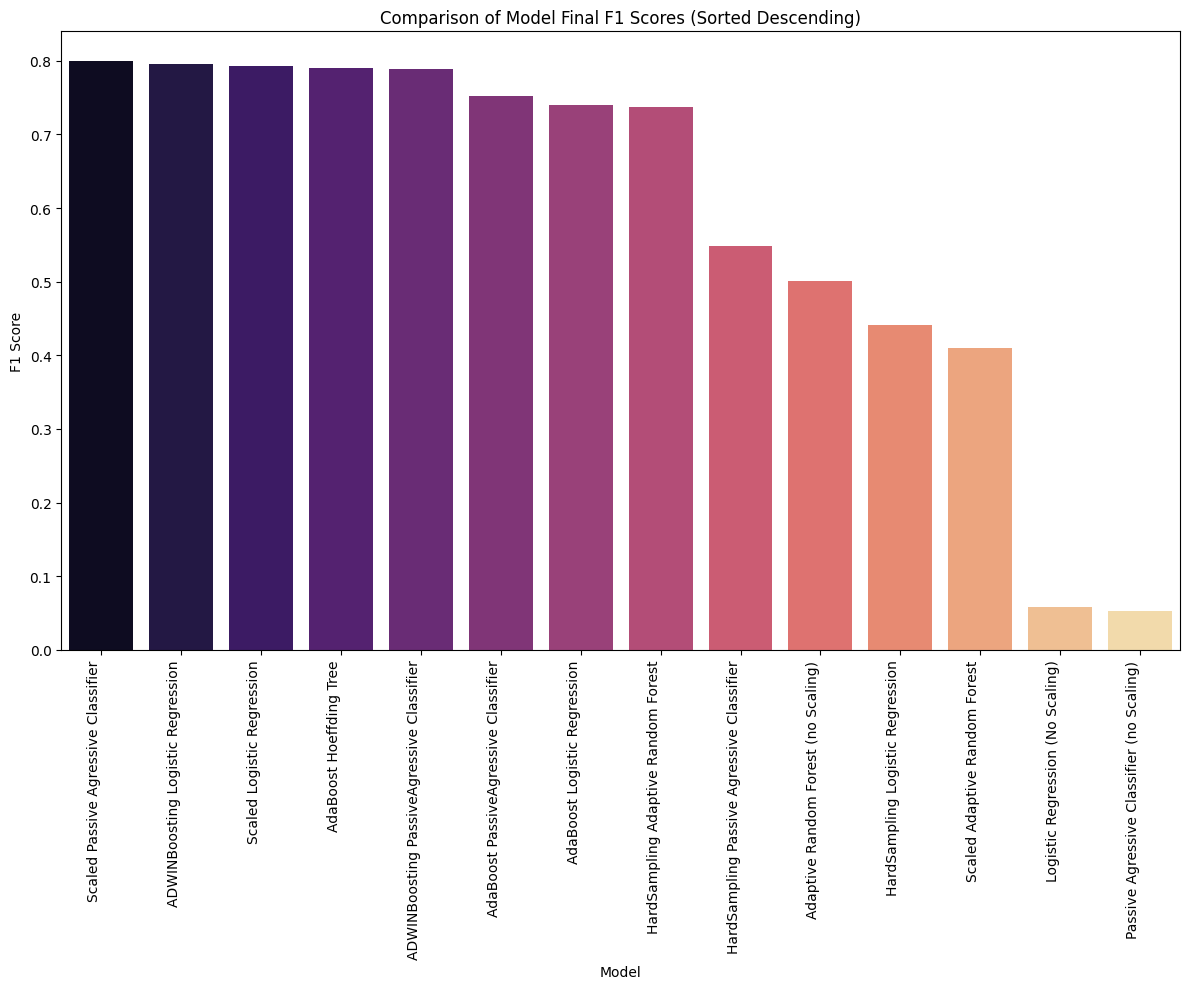

In [ ]:
# Set the index to model names for easier plotting
df_results = df_summary.set_index('Model')

# Plotting the scores
df_f1_sorted = df_results.sort_values(by='Final F1 Score', ascending=False)

# F1 Score plot
plt.figure(figsize=(12, 10))
sns.barplot(x=df_f1_sorted.index, y='Final F1 Score', data=df_f1_sorted, palette='magma')
plt.title('Comparison of Model Final F1 Scores (Sorted Descending)')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()



/tmp/ipython-input-3174712153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_mcc_sorted.index, y='Final MCC Score', data=df_mcc_sorted, palette='magma')


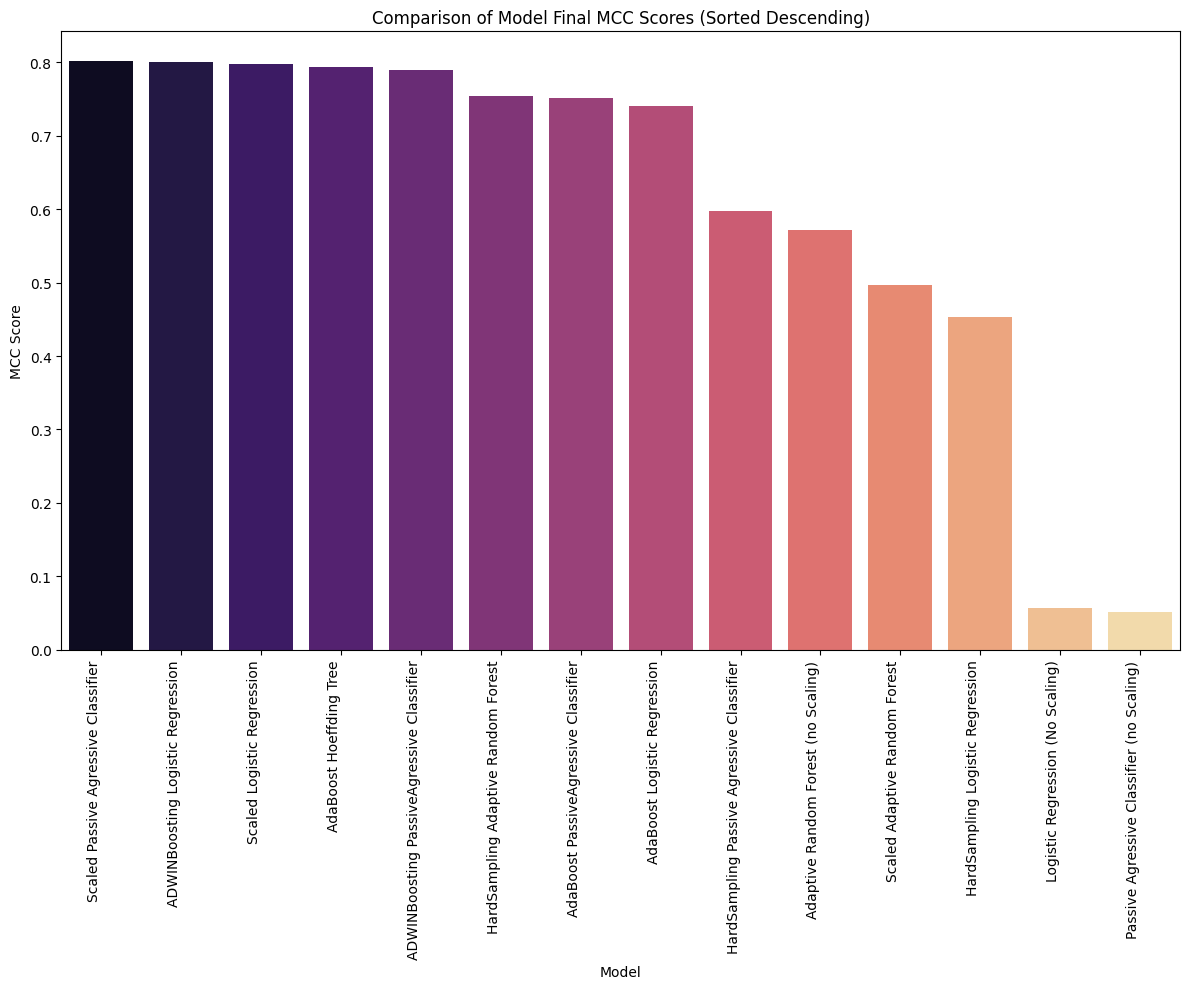

In [ ]:
df_mcc_sorted = df_results.sort_values(by='Final MCC Score', ascending=False)

# MCC Score plot
plt.figure(figsize=(12, 10))
sns.barplot(x=df_mcc_sorted.index, y='Final MCC Score', data=df_mcc_sorted, palette='magma')
plt.title('Comparison of Model Final MCC Scores (Sorted Descending)')
plt.xlabel('Model')
plt.ylabel('MCC Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3676103878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_runtime_sorted.index, y='Total Runtime', data=df_runtime_sorted, palette='magma')


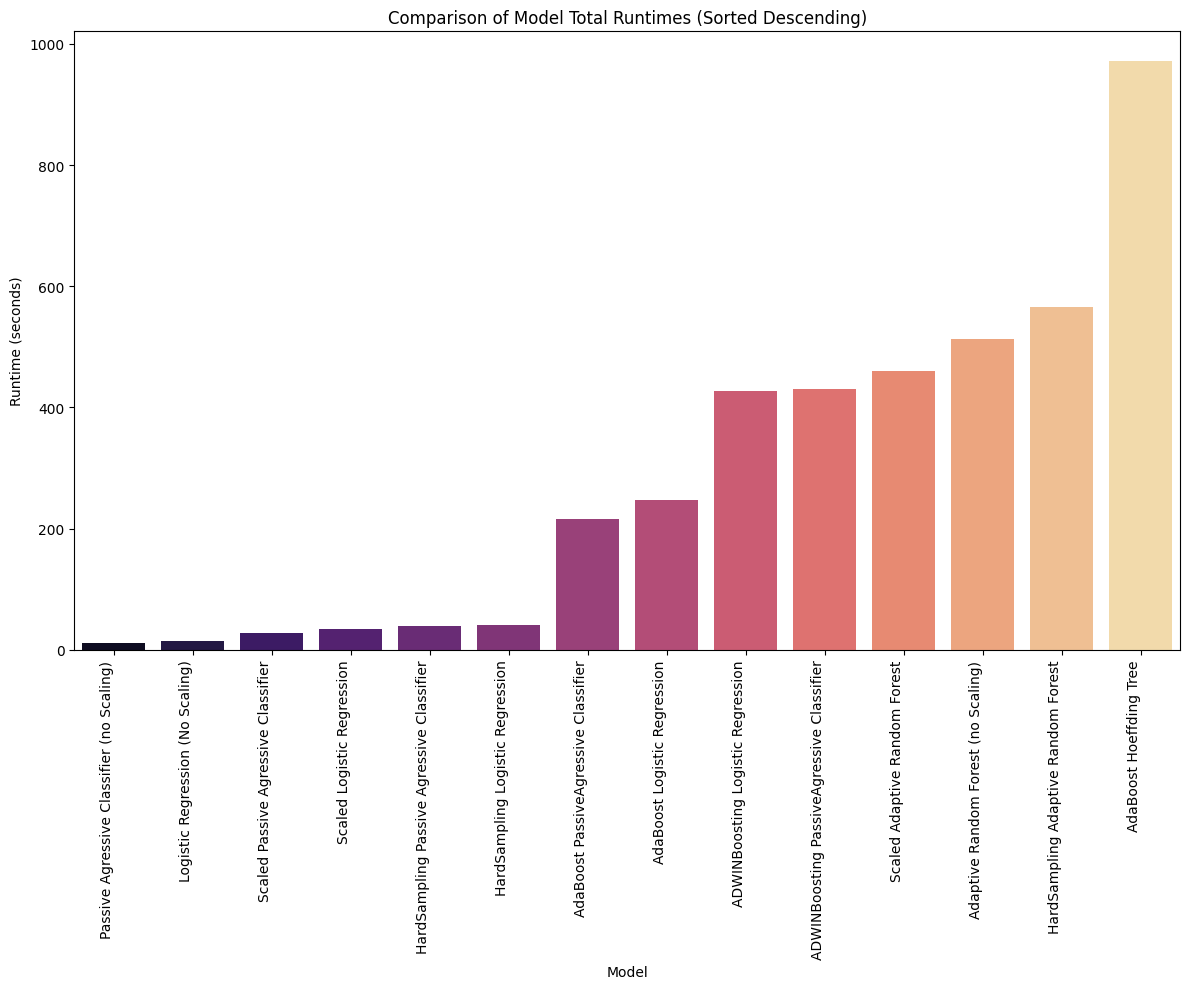

In [ ]:
df_runtime_sorted = df_results.sort_values(by='Total Runtime', ascending=True)

# Total Runtime plot
plt.figure(figsize=(12, 10))
sns.barplot(x=df_runtime_sorted.index, y='Total Runtime', data=df_runtime_sorted, palette='magma')
plt.title('Comparison of Model Total Runtimes (Sorted Descending)')
plt.xlabel('Model')
plt.ylabel('Runtime (seconds)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

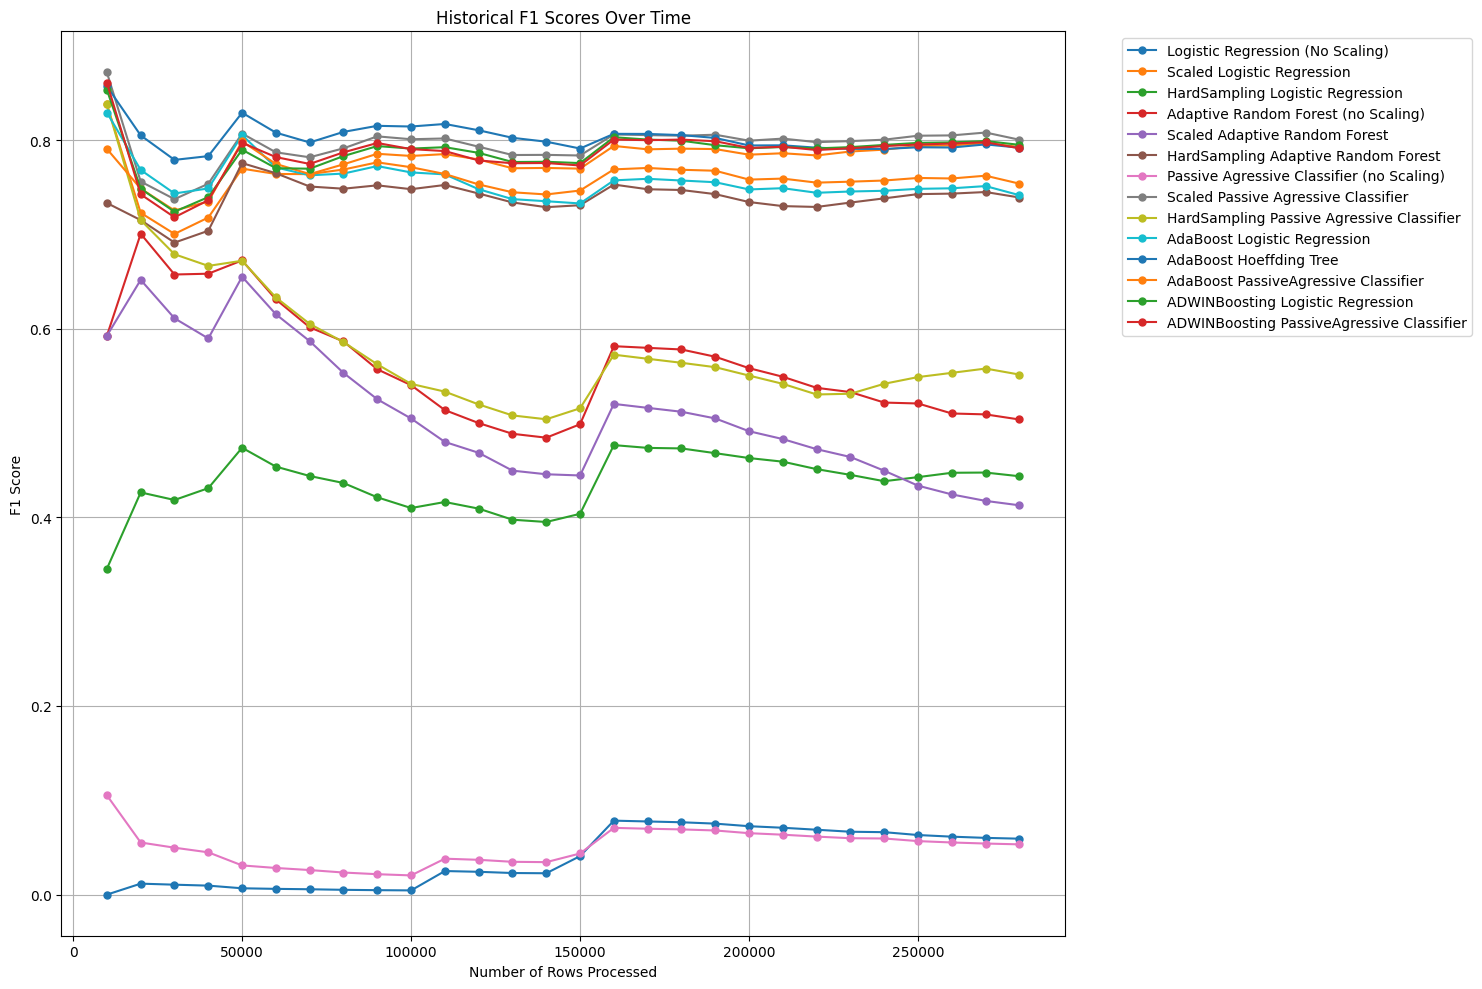

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collect all historical data
historical_data = []

historical_data.extend([
    {'Model': 'Logistic Regression (No Scaling)', 'f1_history': hist_f1_ns, 'mcc_history': hist_mcc_ns, 'rows': rows_ns},
    {'Model': 'Scaled Logistic Regression', 'f1_history': hist_f1_sc, 'mcc_history': hist_mcc_sc, 'rows': rows_sc},
    {'Model': 'HardSampling Logistic Regression', 'f1_history': hist_f1_hs_logreg, 'mcc_history': hist_mcc_hs_logreg, 'rows': rows_hs_logreg},
    {'Model': 'Adaptive Random Forest (no Scaling)', 'f1_history': hist_f1_ARF, 'mcc_history': hist_mcc_ARF, 'rows': rows_ARF},
    {'Model': 'Scaled Adaptive Random Forest', 'f1_history': hist_f1_sc_ARF, 'mcc_history': hist_mcc_sc_ARF, 'rows': rows_sc_ARF},
    {'Model': 'HardSampling Adaptive Random Forest', 'f1_history': hist_f1_hs_ARF, 'mcc_history': hist_mcc_hs_ARF, 'rows': rows_hs_ARF},
    {'Model': 'Passive Agressive Classifier (no Scaling)', 'f1_history': hist_f1_pa, 'mcc_history': hist_mcc_pa, 'rows': rows_pa},
    {'Model': 'Scaled Passive Agressive Classifier', 'f1_history': hist_f1_sc_pa, 'mcc_history': hist_mcc_sc_pa, 'rows': rows_sc_pa},
    {'Model': 'HardSampling Passive Agressive Classifier', 'f1_history': hist_f1_hs_pa, 'mcc_history': hist_mcc_hs_pa, 'rows': rows_hs_pa},
    {'Model': 'AdaBoost Logistic Regression', 'f1_history': hist_f1_ada, 'mcc_history': hist_mcc_ada, 'rows': rows_ada},
    {'Model': 'AdaBoost Hoeffding Tree', 'f1_history': hist_f1_ada_ht, 'mcc_history': hist_mcc_ada_ht, 'rows': rows_ada_ht},
    {'Model': 'AdaBoost PassiveAgressive Classifier', 'f1_history': hist_f1_ada_pa, 'mcc_history': hist_mcc_ada_pa, 'rows': rows_ada_pa},
    {'Model': 'ADWINBoosting Logistic Regression', 'f1_history': hist_f1_adwin_lr, 'mcc_history': hist_mcc_adwin_lr, 'rows': rows_adwin_lr},
    {'Model': 'ADWINBoosting PassiveAgressive Classifier', 'f1_history': hist_f1_adwin_pa, 'mcc_history': hist_mcc_adwin_pa, 'rows': rows_adwin_pa}
])

# Plotting Historical F1 Scores
plt.figure(figsize=(15, 10))
for data in historical_data:
    plt.plot(data['rows'], data['f1_history'], label=data['Model'], marker='o', markersize=5)
plt.title('Historical F1 Scores Over Time')
plt.xlabel('Number of Rows Processed')
plt.ylabel('F1 Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



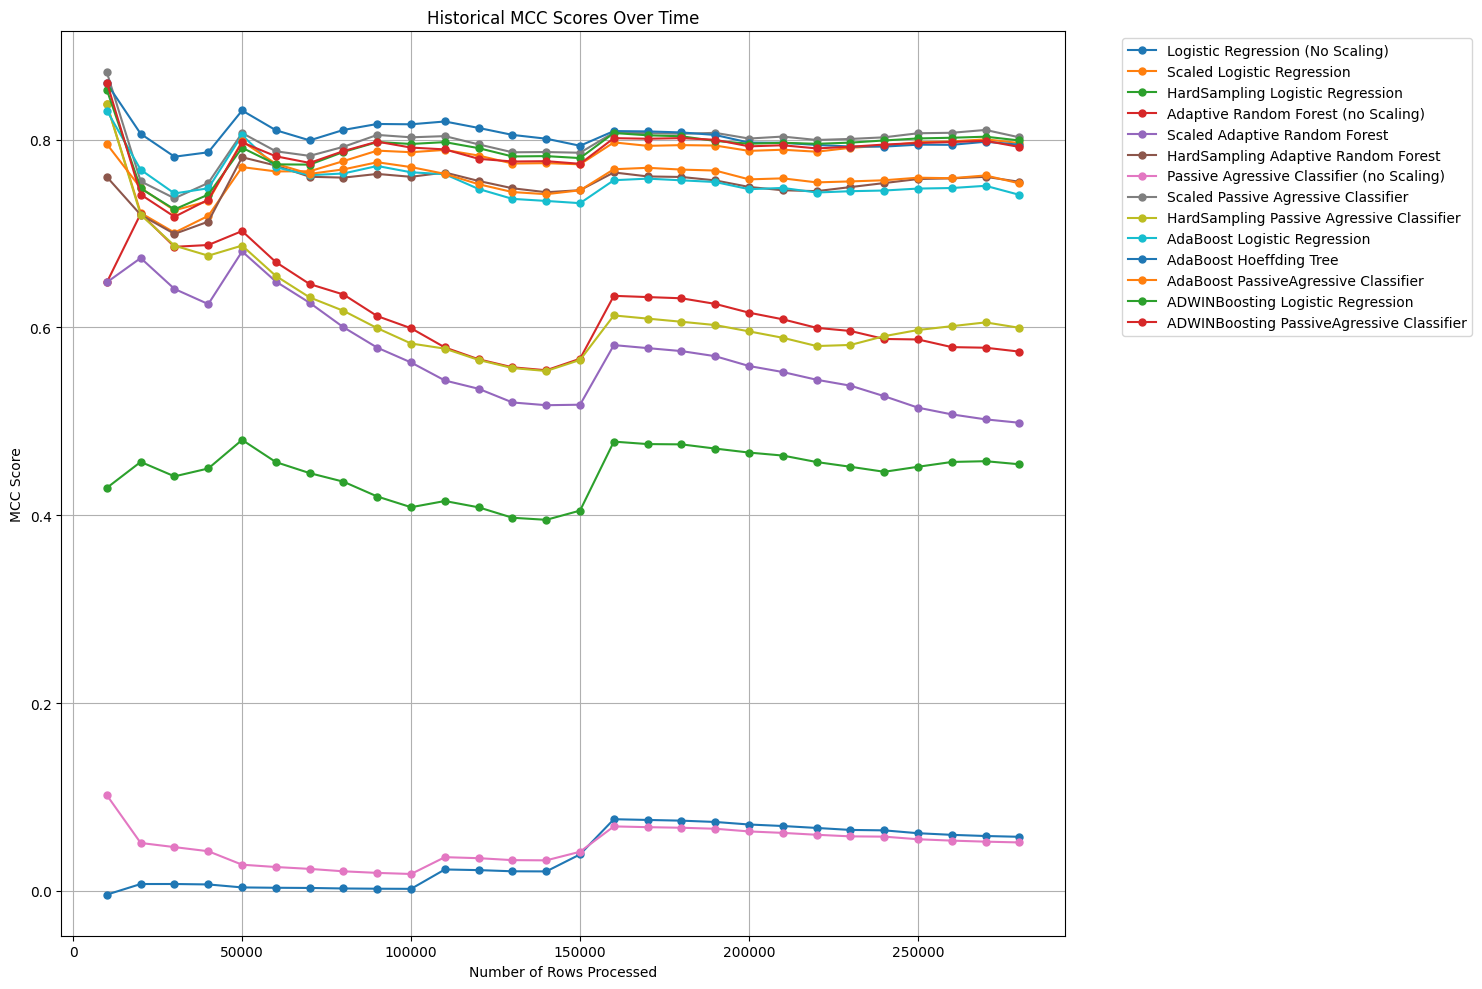

In [ ]:
# Plotting Historical MCC Scores
plt.figure(figsize=(15, 10))
for data in historical_data:
    plt.plot(data['rows'], data['mcc_history'], label=data['Model'], marker='o', markersize=5)
plt.title('Historical MCC Scores Over Time')
plt.xlabel('Number of Rows Processed')
plt.ylabel('MCC Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

This notebook systematically evaluated various online machine learning models from the `River` library for credit card fraud detection. The models were compared based on their final F1 score, MCC score, and total runtime, with historical performance also visualized.

### Key Findings:

*   **Impact of Scaling:** Feature scaling (e.g., using `StandardScaler`) had a significant positive impact on the performance of linear models like `LogisticRegression` and `PAClassifier`. Models without scaling often performed poorly, highlighting the importance of preprocessing for these algorithms in an online learning context.

*   **Impact of HardSampling:** While `HardSamplingClassifier` was intended to address class imbalance, its effect on overall performance (F1 and MCC) varied. For Logistic Regression, HardSampling drastically reduced performance compared to its scaled counterpart. For `ARFClassifier` and `PAClassifier`, HardSampling generally improved performance, indicating its utility can be model-specific and might require careful tuning.

*   **Ensemble Methods:** Ensemble methods like `AdaBoostClassifier` and `ADWINBoostingClassifier` generally showed strong performance. `ADWINBoostingClassifier` with `LogisticRegression` as a base estimator achieved one of the highest F1 and MCC scores, demonstrating its robustness and adaptability to data streams.

*   **Performance vs. Runtime:** There was often a trade-off between model complexity, performance, and runtime. Simple scaled models like `Scaled Passive Agressive Classifier` and `Scaled Logistic Regression` offered competitive performance with relatively lower runtimes compared to more complex ensemble models like `AdaBoost Hoeffding Tree`.

*   **Top Performing Models:**
    *   `Scaled Logistic Regression` and `Scaled Passive Agressive Classifier` consistently delivered high F1 and MCC scores.
    *   `ADWINBoosting Logistic Regression` and `AdaBoost Hoeffding Tree` also performed exceptionally well, demonstrating the power of adaptive ensemble methods.

### Overall Takeaways:

For online credit card fraud detection, feature scaling is crucial for many models. Ensemble methods, especially adaptive ones, proved to be highly effective. The choice of sampling technique (like HardSampling) should be carefully considered and evaluated based on the specific base model and dataset characteristics. Future work could involve hyperparameter tuning for the top-performing models and exploring other advanced online learning techniques to further enhance fraud detection capabilities.